# Kaggle Competition of Iceberg


## Peining Che, Shangye Chen

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Import package we will need. We will use pandas for reading the json files.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

#from subprocess import check_output

## Data

Read data using pandas.

In [6]:
train_df = pd.read_json('train.json') # Read the json files into a pandas dataframe

In [7]:
test_df = pd.read_json('test.json')

After read data, we implement graphs that show some of the train images and test images. There are 2 kinds of images in the data set: band 1 images and band 2 images. We will select randomly for each type and display. As the Kaggle competition said, the images have 70X75 pixels size, so we reshape the image before displaying. 

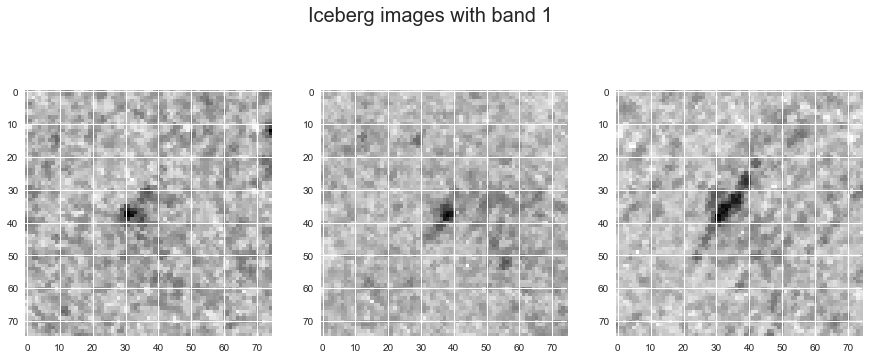

In [8]:
# FIrst we will get 9 random icebergs
df_plot = train_df.loc[train_df['is_iceberg'] == True].sample(3)

plt.figure(figsize=(15,6))
for i in range(3):
     # we will set the current subplot
    plt.subplot(1,3,(i+1))
     # Then we will reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_1']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)
    # finally we will set the title as
plt.suptitle('Iceberg images with band 1',fontsize=20)

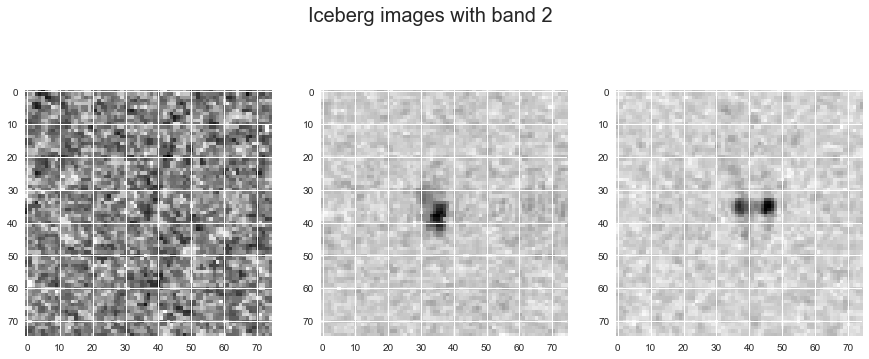

In [13]:
plt.figure(figsize=(15,6))
for i in range(3):
     # Set the current subplot
    plt.subplot(1,3,(i+1))
    # Reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_2']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)
    

plt.suptitle('Iceberg images with band 2',fontsize=20)

Images for boats.

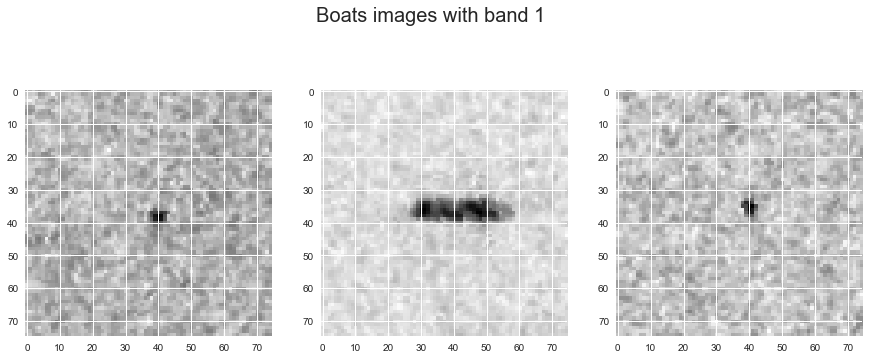

In [16]:
# FIrst get 9 random boats
df_plot = train_df.loc[train_df['is_iceberg'] == False].sample(9)

plt.figure(figsize=(15,6))
for i in range(3):
     # Set the current subplot
    plt.subplot(1,3,(i+1))
    # Reshape the array to 75x75
    image = np.array(df_plot.iloc[i]['band_1']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)

    
plt.suptitle('Boats images with band 1', fontsize=20)

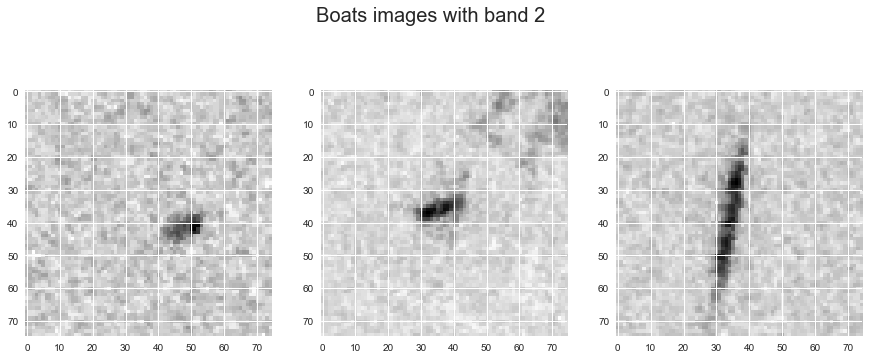

In [15]:
plt.figure(figsize=(15,6))
for i in range(3):
    plt.subplot(1,3,(i+1))
    image = np.array(df_plot.iloc[i]['band_2']).reshape((75,75)).astype(np.float32)
    plt.imshow(image)

    
plt.suptitle('Boats images with band 2', fontsize=20)

Since there are some invalid value under inc_anfle, we need to change the value to numerical values in order to train the data sets. Also, reshape all images into 75 by 75 pixels. 

In [ ]:
train_df.inc_angle = train_df.inc_angle.replace('na',0)
test_df.inc_angle = test_df.inc_angle.replace('na',0)

In [ ]:
# Train data
x_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_df["band_1"]])
x_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train_df["band_2"]])
X_train = np.concatenate([x_band1[:, :, :, np.newaxis], x_band2[:, :, :, np.newaxis]], axis=-1)
y_train = np.array(train_df["is_iceberg"])
print("Xtrain:", X_train.shape)

In [30]:
# Test data
x_test_band1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_df["band_1"]])
x_test_band2 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in test_df["band_2"]])
X_test = np.concatenate([x_test_band1[:, :, :, np.newaxis], x_test_band2[:, :, :, np.newaxis]], axis=-1)
print("Xtest:", X_test.shape)

('Xtest:', (8424, 75, 75, 2))


## Modeling with Keras

Then, we can apply Keras on the well trained data. We have backend Keras tensorflow in the system already.

In [17]:
from subprocess import check_output
from keras.models import Sequential
from keras.layers import Convolution2D, GlobalAveragePooling2D, Dense, Dropout

Using TensorFlow backend.


Fit a model using kera.

In [31]:
model = Sequential()
model.add(Convolution2D(32, 3, activation="relu", input_shape=(75, 75, 2)))
model.add(Convolution2D(64, 3, activation="relu", input_shape=(75, 75, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.3))
model.add(Dense(1, activation="sigmoid"))
model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 73, 73, 32)        608       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
global_average_pooling2d_2 ( (None, 64)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 19,169
Trainable params: 19,169
Non-trainable params: 0
_________________________________________________________________


### Model fit and Validation Test

We use the training data to fit above model. The model.fit has defalt shuffle True, and we used the default setting to fit the training data. Since we need to plot the process of model fit, we choose epochs 20.

To choose the validation split, we have examined several different values: 0.2, 0.25, 0.3, 0.35. And we found when validation split equal to 0.25, the training has higher accuracy and lower loss.

In [65]:
history=model.fit(x=X_train, y=y_train, validation_split=0.25, epochs=20)

Train on 1203 samples, validate on 401 samples
Epoch 1/20
1203/1203 [==============================] - 37s 31ms/step - loss: 0.4514 - acc: 0.7914 - val_loss: 0.5237 - val_acc: 0.6933
Epoch 2/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4440 - acc: 0.7905 - val_loss: 0.5206 - val_acc: 0.6833
Epoch 3/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4515 - acc: 0.7880 - val_loss: 0.5226 - val_acc: 0.6858
Epoch 4/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4552 - acc: 0.7872 - val_loss: 0.5169 - val_acc: 0.6933
Epoch 5/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4434 - acc: 0.7872 - val_loss: 0.5081 - val_acc: 0.6933
Epoch 6/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4438 - acc: 0.7897 - val_loss: 0.5358 - val_acc: 0.6958
Epoch 7/20
1203/1203 [==============================] - 36s 30ms/step - loss: 0.4521 - acc: 0.7930 - val_loss: 0.5034 - val_acc: 0.6983
E

In [66]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


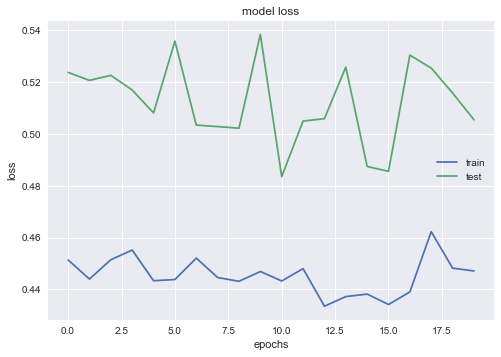

In [67]:
fig = plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'center right')

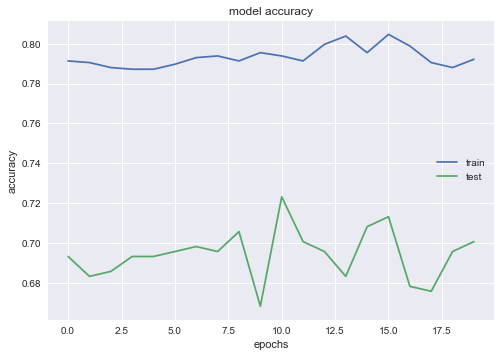

In [68]:
fig = plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc = 'center right')

In [69]:
prediction = model.predict(X_test, verbose=1)

8424/8424 [==============================] - 82s 10ms/step


In [70]:
prediction.shape

(8424, 1)

In [71]:
prediction_result = pd.DataFrame({'id': test_df["id"], 'is_iceberg': prediction.flatten()})

In [72]:
print prediction_result

            id    is_iceberg
0     5941774d  6.994820e-01
1     4023181e  2.806036e-01
2     b20200e4  0.000000e+00
3     e7f018bb  6.909032e-01
4     4371c8c3  4.158715e-02
5     a8d9b1fd  1.012656e-13
6     29e7727e  6.568531e-01
7     92a51ffb  7.015304e-01
8     c769ac97  3.283220e-05
9     aee0547d  1.771475e-05
10    565b28ac  3.265054e-05
11    e04e9775  4.565811e-02
12    8e8161d1  8.795090e-02
13    4cf4d256  5.232091e-01
14    139e5324  4.713257e-18
15    f156976f  9.210016e-02
16    68a117cc  6.082169e-10
17    d9aa7a56  6.500065e-20
18    9005b143  4.104730e-15
19    5f6d3988  7.032159e-01
20    9ad70954  1.382535e-01
21    b9087b9e  6.254975e-01
22    a39a1427  4.953221e-12
23    82fbe8ed  6.033659e-01
24    1fae4879  4.010488e-10
25    6dd8f13d  2.460151e-15
26    bbad5958  4.439051e-01
27    54527583  1.430761e-03
28    be8fa29c  1.079346e-02
29    81a3328f  6.632211e-01
...        ...           ...
8394  8ae30ce6  3.671730e-15
8395  de27ed88  5.154134e-11
8396  66d5196f